# Árboles de Decisión

In [17]:
#Importación de las librerías que se van a usar.
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [18]:
#Función para importar el dataset
def importdataset():
    #Dataset: experiencia/100, Nota/20 (En una prueba).
    df = pandas.read_csv('Dataset/dataset_1.csv')
    print ("Dataset: ", df.head())
    return df

In [19]:
#función para la transformación
def transfordata(df):
    #Transformación del primer conjunto de datos
    con1 = {'Quito': 0, 'Santo_Domingo': 1, 'Manab¡': 2}
    df['Provincia'] = df['Provincia'].map(con1)
    #Transformación del segundo conjunto de datos
    con2 = {'Si' : 1, 'No' : 0}
    df['Trabajo'] = df['Trabajo'].map(con2)
    print ("Dataset transformado: ", df)
    return df

In [20]:
#función para separar los datos del dataset
def sliptdataset(df):
    #Escogiendo las características para realizar la predicción, no se escoge el campo 
    #'provincia' dado que no es relevante.
    caracteristicas = ['Edad', 'Nota', 'Experiencia']
    x = df[caracteristicas]
    #separar la columna con los valores a predecir
    y = df['Trabajo']
    print ("Dataset separando columna: ", x, y, sep ='\n\n')
    return caracteristicas, x, y

In [21]:
#Función para generar el érbol de decisión
def treegenerate(caracteristicas, x, y):
    #Creación de un árbol de decisión
    arbolde = DecisionTreeClassifier()
    arbolde = arbolde.fit(x, y)
    
    #guardar la decisión del árbol en una imagen
    datos = tree.export_graphviz(arbolde, out_file=None, feature_names=caracteristicas)
    grafico = pydotplus.graph_from_dot_data(datos)
    grafico.write_png('arboldecision3.png')
    
    #muestra la imagen
    img = pltimg.imread('arboldecision3.png')
    imgplot = plt.imshow(img)
    plt.show()

In [24]:
#Función principal
def main():
    data = importdataset()
    transforma = transfordata(data)
    caracteristicas, x, y = sliptdataset(transforma)
    treegenerate(caracteristicas, x ,y)

Dataset:     Edad  Experiencia  Nota      Provincia Trabajo
0    23           30    18          Quito      No
1    20           19    17  Santo_Domingo      No
2    30           18    18          Quito      Si
3    22           24    18  Santo_Domingo      Si
4    57           22    18          Quito      Si
Dataset transformado:      Edad  Experiencia  Nota  Provincia  Trabajo
0     23           30    18          0        0
1     20           19    17          1        0
2     30           18    18          0        1
3     22           24    18          1        1
4     57           22    18          0        1
5     23           22    17          0        0
6     18           28    18          1        0
7     25           23    17          2        1
8     23           25    18          1        1
9     23           24    17          0        0
10    18           25    19          2        0
11    18           30    18          0        0
12    28           19    18          1     

<IPython.core.display.Javascript object>


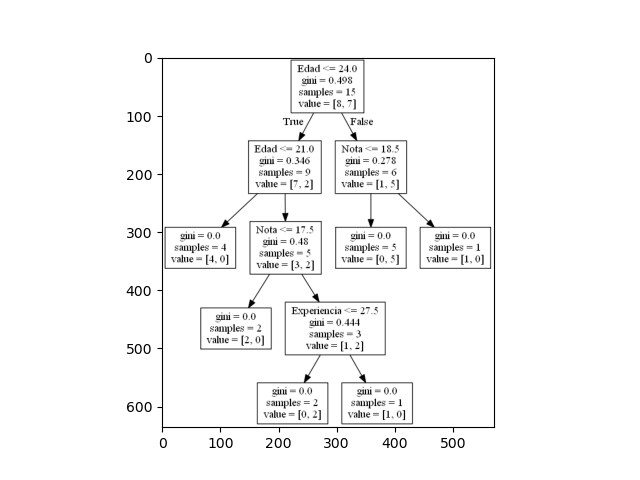

In [25]:
#Ejecución del código principal
if __name__=="__main__":
    main()